### Problem Statement:

Lower back pain is a major cause of morbidity in the developed world, affecting 40% of people at some point in their lives. Back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs, or tendons in the lumbar spine. 

An irritation or problem with any of these structures can cause lower back pain and/or pain that radiates or is referred to other parts of the body. Many lower back problems also lead to back muscle spasms, which can cause severe pain and disability.

While lower back pain is extremely common, the symptoms and severity of lower back pain vary greatly. 

The spine of each patient was classified as - normal or abnormal, by practitioners, using the collected physical spine details/data.

1. Pelvic_incidence: angle between a line perpendicular to the sacral plate at its midpoint and a line connecting this point to the femoral head axis.

2. Pelvic tilt: is a position-dependent parameter defined as the angle created by a line running from the sacral endplate midpoint to the center of the bifemoral heads and the vertical axis

3. Lumbar_lordosis_angle: is defined by the angle between the upper plane of the L1 lumbar vertebrae and the upper plane of the S1 sacral vertebrae.

4. Sacral_slope: is defined as the angle between the horizontal and the sacral plate, and is a critical spinal parameter in the analysis of sagittal balance.

5. Pelvic_radius: The distance from the hip axis to the posterior-superior corner of the S1 endplate

6. Degree_spondylolisthesis: spondylolisthesis is a forward slip of one vertebra. Spondylolisthesis usually occurs towards the base of your spine in the lumbar area. The degree of spondylolisthesis describes the severity of vertebral body slipped forward.

7. Pelvic_slope: is the angle between a vertical line and the CS segment

8. Direct_tilt: *No Information*

9. Thoracic_slope: thoracic  angle between T1 slope and neck tilt

10. Cervical_tilt:n angle formed between the vertical line from the center of T1UEP and the line from the center of T1UEP to the center of the C2 vertebra

11. Sacrum_angle: is the angle formed by the true conjugate with the two pieces of the sacrum.

12. Scoliosis_slope: Scoliosis is a sideways curvature of the spine it represents the angle formed from the curvature of the spine

13. Status:- Normal or Abnormal

NB: To maintain uniformity in the results, please use random_state=1 while splitting the dataset and model-building

In [18]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix

In [2]:
# Load the dataset

df= pd.read_csv("backpain.csv")
df

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [3]:
# Check the number of rows and columns
df.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [4]:
# check the shape of the dataset
df.shape

(310, 13)

In [5]:
# check for structure of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


## Visualize the data

In [6]:
from utils import labeled_barplot

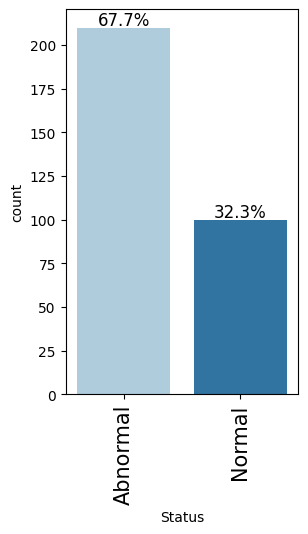

In [7]:
labeled_barplot(data = df, feature = 'Status', perc =True)

In [8]:
df["Status"].value_counts(normalize= True)

Abnormal    0.677419
Normal      0.322581
Name: Status, dtype: float64

### Identifying correlation

In [9]:
# check duplicates
df.duplicated().sum()

0

In [10]:
# check for correlation
mat_corr = df.corr()
mat_corr

C:\Users\SERWAH\AppData\Local\Temp\ipykernel_8588\2090030125.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat_corr = df.corr()


,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


In [11]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Find variables with correlation >= 0.7 with 'pelvic_incidence'
correlated_variables = correlation_matrix[abs(correlation_matrix['pelvic_incidence']) >= 0.7].index.tolist()

# Print the correlated variables
print(correlated_variables)

['pelvic_incidence', 'lumbar_lordosis_angle', 'sacral_slope']


C:\Users\SERWAH\AppData\Local\Temp\ipykernel_8588\1741257151.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


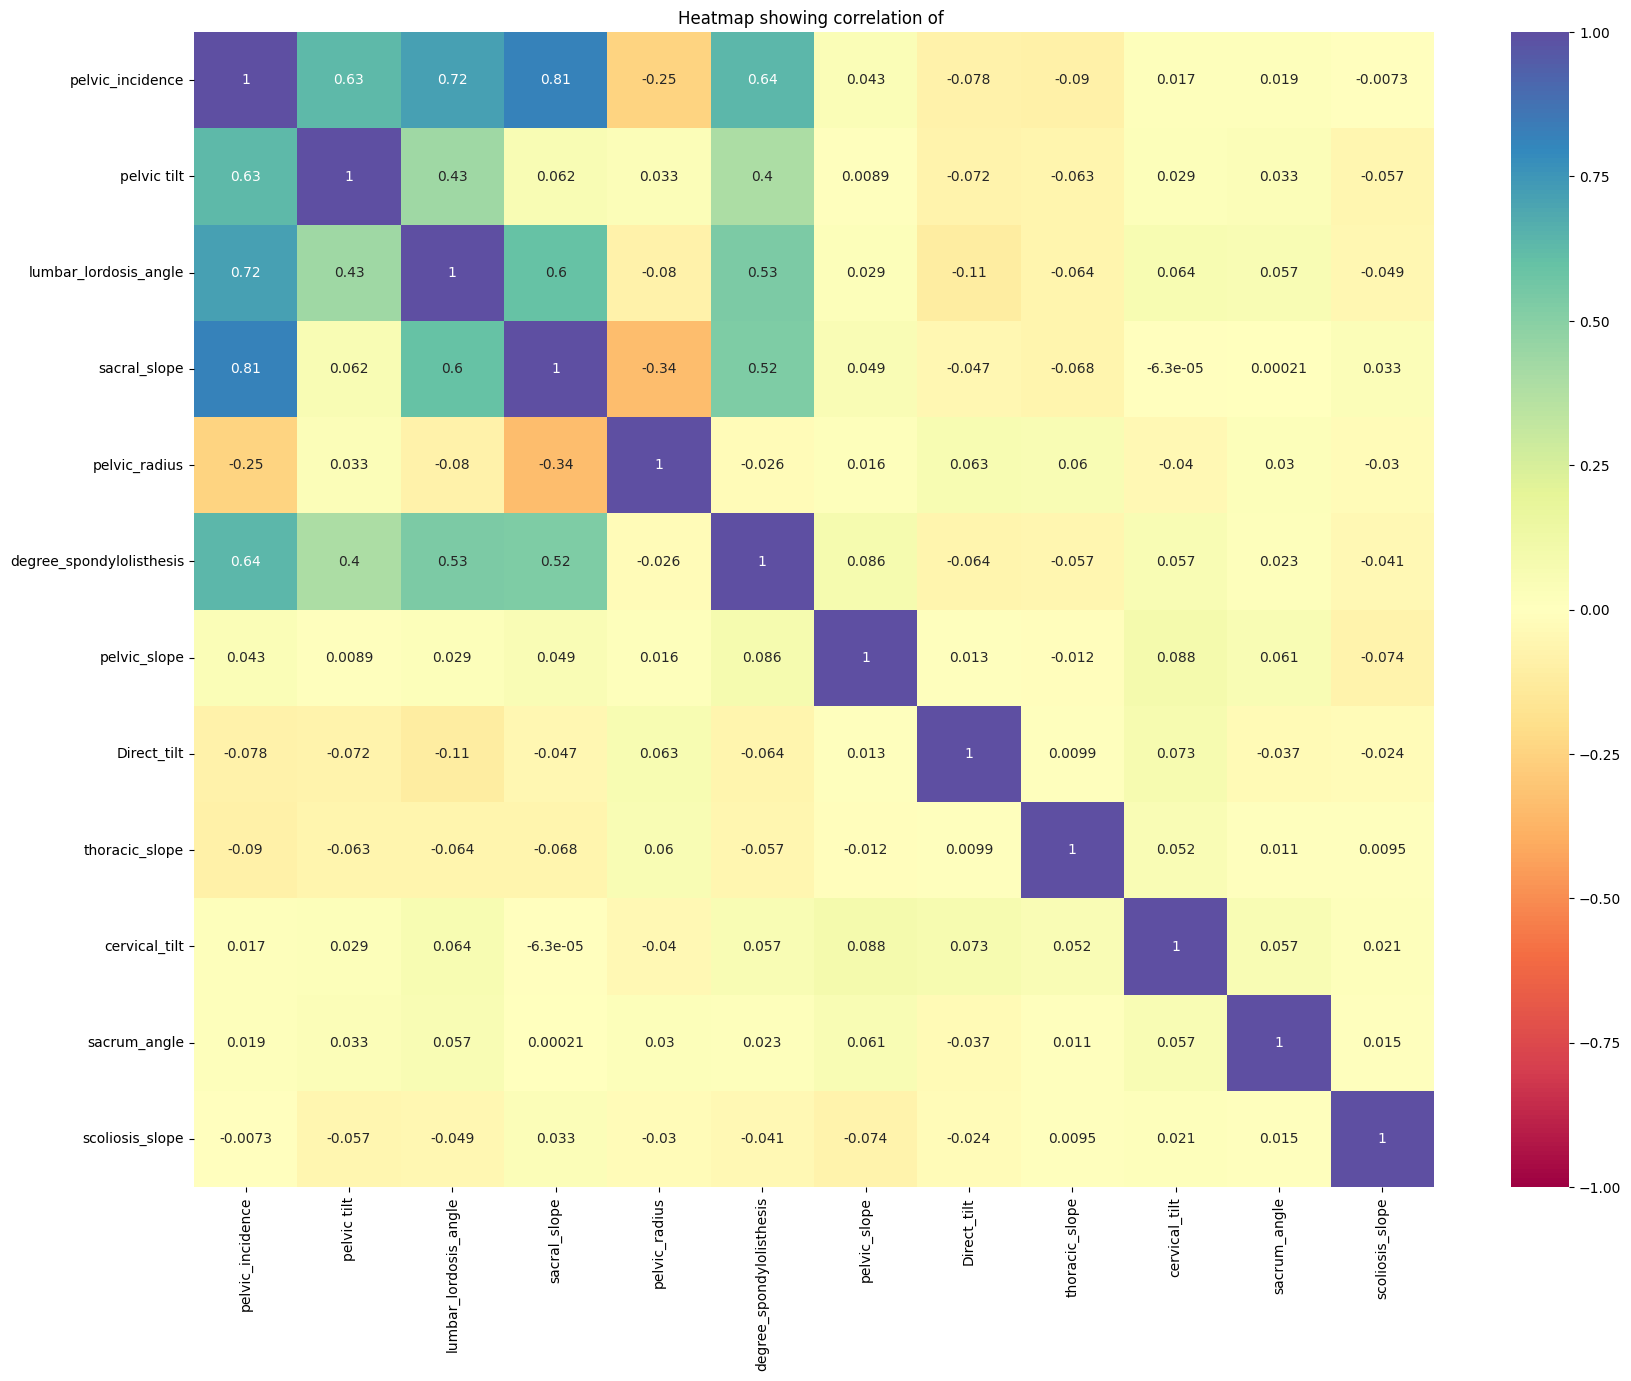

In [12]:
plt.figure(figsize = (20,15))
sns.heatmap(mat_corr, annot= True, vmin = -1, vmax = 1, cmap = "Spectral")
plt.title("Heatmap showing correlation of ");

In [13]:
# Encode 'Status' variable
df['Status'] = df['Status'].map({'Abnormal': 1, 'Normal': 0})

# Split the data into train and test sets
X = df.drop('Status', axis=1)
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [14]:
# # Calculate the percentage of 0 and 1 classes in y_test
# class_percentage = y_test.value_counts(normalize=True) * 100

# # Print the class percentages
# print(class_percentage)

In [15]:
# distributing your target at the status
y_test.value_counts(normalize= True)

1    0.709677
0    0.290323
Name: Status, dtype: float64

## Logistic Regression

In [19]:
scaler = MinMaxScaler()

X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(X_test)

In [21]:
# build the model

log_reg = LogisticRegression(random_state= 0)

log_reg.fit(X_train_sd, y_train)

LogisticRegression(random_state=0)

In [22]:
log_reg.score(X_train_sd, y_train)

0.7741935483870968

In [23]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:,1]
    
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)# to compute accuracy
    recall = recall_score(target, pred_class) # to compute recall
    precision = precision_score(target, pred_class) # compute precision
    f1 = f1_score(target, pred_class) # to compute F1 Score

       # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf =  confusion_matrix(target, pred_class)
    plt.figure(figsize = (8,5))
    sns.heatmap(conf, annot = True, fmt = "g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()

    return df_perf

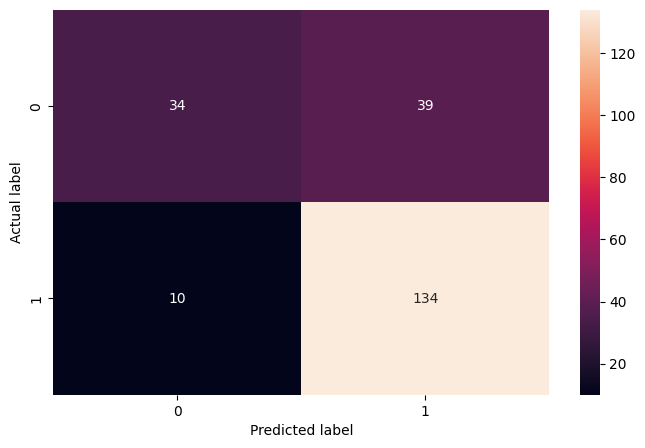

,Accuracy,Recall,Precision,F1-score
0,0.774194,0.930556,0.774566,0.845426


In [25]:
log_reg_train = model_performance_classification(log_reg, X_train_sd,y_train)
log_reg_train

                 Predicted Positive    Predicted Negative
Actual Positive        TP                      FN
Actual Negative        FP                      TN


In this matrix, the top left entry represents the true positives (TP) - instances that are actually positive and correctly predicted as positive by the model. The bottom right entry represents the true negatives (TN) - instances that are actually negative and correctly predicted as negative by the model.

False positives (FP) are instances that are actually negative but incorrectly predicted as positive by the model. They are found in the top right entry of the confusion matrix.

False negatives (FN) are instances that are actually positive but incorrectly predicted as negative by the model. They are located in the bottom left entry of the confusion matrix.

To identify false positives and false negatives from a confusion matrix, you need to determine which entries correspond to instances that were incorrectly predicted by the model compared to their true labels.

In [26]:
# Build the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.94      0.91      0.92        66

    accuracy                           0.89        93
   macro avg       0.87      0.88      0.87        93
weighted avg       0.90      0.89      0.89        93



C:\Users\SERWAH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Build the logistic regression model with specified parameters
model = LogisticRegression(solver="liblinear", random_state=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the recall score on the test set
recall = recall_score(y_test, y_pred)

print("Recall score on test set:", recall)

Recall score on test set: 0.8787878787878788


In [31]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract the number of false negatives from the confusion matrix
false_negatives = conf_matrix[1, 0]

# Calculate the false negative rate (type-2 error rate)
actual_negatives = conf_matrix[0, 0] + conf_matrix[0, 1]
false_negative_rate = false_negatives / actual_negatives

print("False Negatives:", false_negatives)
print("False Negative Rate:", false_negative_rate)

False Negatives: 8
False Negative Rate: 0.2962962962962963


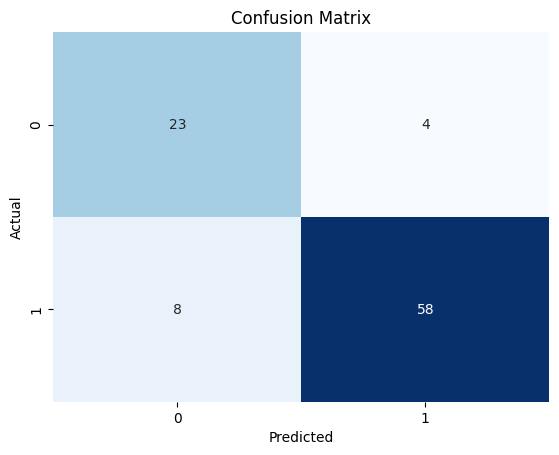

In [32]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Increasing the threshold does not change the values in the confusion matrix of a model for a given dataset. True or False

False.

Increasing the threshold can indeed change the values in the confusion matrix of a model for a given dataset. The threshold is used to convert the probabilities predicted by a model into binary class labels. By adjusting the threshold, you change the criteria for classifying an instance as positive or negative.

When you increase the threshold, you are making the model more conservative in predicting positive instances. This can result in a decrease in the number of false positives but may also lead to an increase in false negatives. Consequently, the values in the confusion matrix, such as true positives, true negatives, false positives, and false negatives, can be affected.

For example, if you increase the threshold in a binary classification problem, the model may become less likely to predict positive instances, leading to a decrease in the number of false positives but potentially increasing the number of false negatives. This would result in changes in the corresponding entries of the confusion matrix.

Therefore, adjusting the threshold can have an impact on the distribution of predictions and, subsequently, on the values in the confusion matrix.

State whether the following statement is True or False:

"Different models will have different ROCs and the model which has the highest Area Under the Curve (AUC) will be chosen as the best model."

Let's assume based on the features, the obtained estimated probability is 0.75. What is the meaning of this estimated probability in this case?

Note - The threshold to differ the classes is 0.5.

a)The spine of the person is Abnormal

b)The spine of the person is Normal

c) Can't determine

answer a) The spine of the person is Abnormal.

Since the obtained estimated probability is 0.75, which is higher than the threshold of 0.5, the model would classify the instance as belonging to the positive class. In this case, the positive class represents an abnormal spine. Therefore, based on the estimated probability of 0.75 and the given threshold, the meaning of this estimated probability is that the model predicts the spine of the person to be abnormal.

While predicting if a person has an abnormal spine, you end up classifying everyone as normal while there were actually 100 people having an abnormal spine. The accuracy of your model is:


a)~ 90%

b) ~ 0%

c) ~ 99%

d) ~ 50%


answer c) ~ 99%

Since the model classifies everyone as normal and there were actually 100 people with an abnormal spine, it means that all the positive instances (abnormal spines) were classified incorrectly as negative (normal). This results in a total misclassification of the positive class. Therefore, the accuracy of the model would be close to 0% because the number of correct predictions (true negatives) is high, but the number of incorrect predictions (false negatives) is also high, resulting in a very low accuracy.